In [1]:
import pandas as pd

data = pd.read_csv("Loan_Default.csv")

In [2]:
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
for col in data.columns:
    if data[col].dtype == "object":
        print(data[col].unique())

['cf' nan 'ncf']
['Sex Not Available' 'Male' 'Joint' 'Female']
['nopre' 'pre' nan]
['type1' 'type2' 'type3']
['p1' 'p4' 'p3' 'p2' nan]
['l1' 'l2']
['nopc' 'opc']
['nob/c' 'b/c']
['not_neg' 'neg_amm' nan]
['not_int' 'int_only']
['not_lpsm' 'lpsm']
['sb' 'mh']
['pr' 'sr' 'ir']
['home' 'land']
['1U' '2U' '3U' '4U']
['EXP' 'EQUI' 'CRIF' 'CIB']
['CIB' 'EXP']
['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
['to_inst' 'not_inst' nan]
['south' 'North' 'central' 'North-East']
['direct' 'Indriect']


In [15]:
from tqdm import tqdm
type_of_nan = set()
for col in (range(len(data.columns))):
    if data.iloc[:,col].dtype != "object":
        for row in tqdm(range(len(data))):
            try:
                int_val = int(data.iloc[row, col])
            except Exception as e:
                type_of_nan.add(data.iloc[row, col])
print(type_of_nan)

 25%|██▌       | 37784/148670 [01:39<04:52, 378.92it/s] 


KeyboardInterrupt: 

In [16]:
# in the above code i have check whether all nan values are of same type meaning is it nan null or NAn or what.

# now lets move on

data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [17]:
# Lets first check amount of null values in each column

for col in data.columns:
    print(f"{col}: \n {(data[col].isna().sum())/len(data)*100} %")

ID: 
 0.0 %
year: 
 0.0 %
loan_limit: 
 2.2492769220421067 %
Gender: 
 0.0 %
approv_in_adv: 
 0.6107486379229166 %
loan_type: 
 0.0 %
loan_purpose: 
 0.09013250823972557 %
Credit_Worthiness: 
 0.0 %
open_credit: 
 0.0 %
business_or_commercial: 
 0.0 %
loan_amount: 
 0.0 %
rate_of_interest: 
 24.509988565278807 %
Interest_rate_spread: 
 24.64451469697989 %
Upfront_charges: 
 26.664424564471652 %
term: 
 0.027577856998722002 %
Neg_ammortization: 
 0.08138830967915517 %
interest_only: 
 0.0 %
lump_sum_payment: 
 0.0 %
property_value: 
 10.15537768211475 %
construction_type: 
 0.0 %
occupancy_type: 
 0.0 %
Secured_by: 
 0.0 %
total_units: 
 0.0 %
income: 
 6.154570525324544 %
credit_type: 
 0.0 %
Credit_Score: 
 0.0 %
co-applicant_credit_type: 
 0.0 %
age: 
 0.13452613170108293 %
submission_of_application: 
 0.13452613170108293 %
LTV: 
 10.15537768211475 %
Region: 
 0.0 %
Security_Type: 
 0.0 %
Status: 
 0.0 %
dtir1: 
 16.224524113809107 %


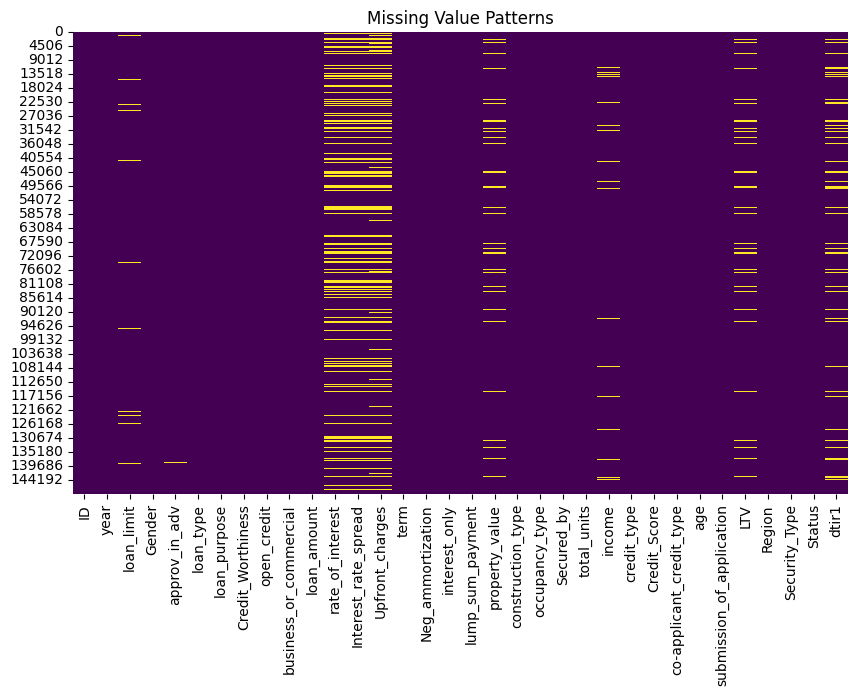

Columns with missing values:
loan_limit                    3344
approv_in_adv                  908
loan_purpose                   134
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
property_value               15098
income                        9150
age                            200
submission_of_application      200
LTV                          15098
dtir1                        24121
dtype: int64


In [19]:

import seaborn as sns
import matplotlib.pyplot as plt

# Identify missing values count for each column
missing_values = data.isnull().sum()

# Visualize missing value patterns using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Value Patterns')
plt.show()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

In [23]:
# Lets drop the missing values columns who contain more than 20% missing values

drop_cols = []
for col in data.columns:
    if data[col].isna().sum()/len(data) >= 0.20:
        drop_cols.append(col)

data.drop(columns=drop_cols, inplace=True)

In [30]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [26]:
# Lets handle other missing values

numeric_df = data.select_dtypes(exclude='object')

for col in numeric_df.columns:
    
    numeric_df[col].fillna(numeric_df[col].median(), inplace=True)


c:\users\naman\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\users\naman\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\users\naman\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [31]:
numeric_df.isna().sum()

ID                0
year              0
loan_amount       0
term              0
property_value    0
income            0
Credit_Score      0
LTV               0
Status            0
dtir1             0
dtype: int64

In [35]:
categorical_df = data.select_dtypes(include='object')
for col in categorical_df.columns:
    
    categorical_df[col].fillna(categorical_df[col].mode()[0], inplace=True)

In [36]:
categorical_df.isna().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
dtype: int64

In [37]:
final_df = pd.concat([numeric_df, categorical_df], axis=1)
final_df.head()

,ID,year,loan_amount,term,property_value,income,Credit_Score,LTV,Status,dtir1,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,24890,2019,116500,360.0,118000.0,1740.0,758,98.728814,1,45.0,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,24891,2019,206500,360.0,418000.0,4980.0,552,75.135870,1,39.0,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,24892,2019,406500,360.0,508000.0,9480.0,834,80.019685,0,46.0,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,24893,2019,456500,360.0,658000.0,11880.0,587,69.376900,0,42.0,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,24894,2019,696500,360.0,758000.0,10440.0,602,91.886544,0,39.0,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


In [38]:
final_df.isna().sum()

ID                           0
year                         0
loan_amount                  0
term                         0
property_value               0
income                       0
Credit_Score                 0
LTV                          0
Status                       0
dtir1                        0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
dtype: int64

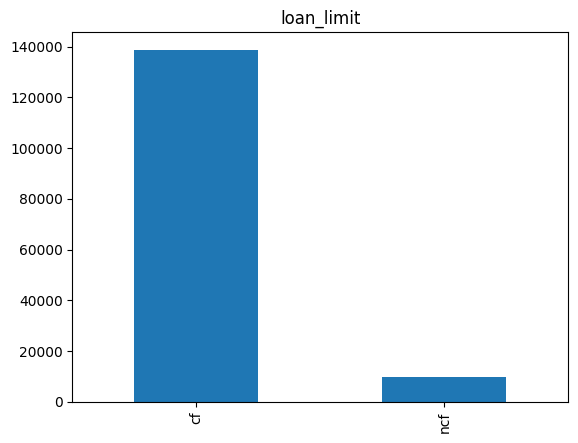

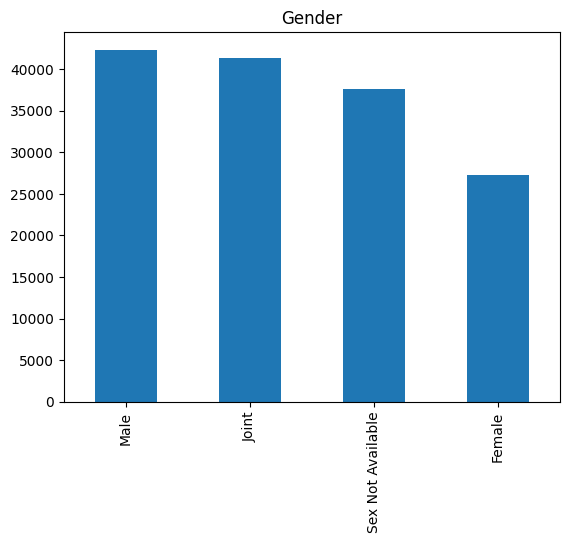

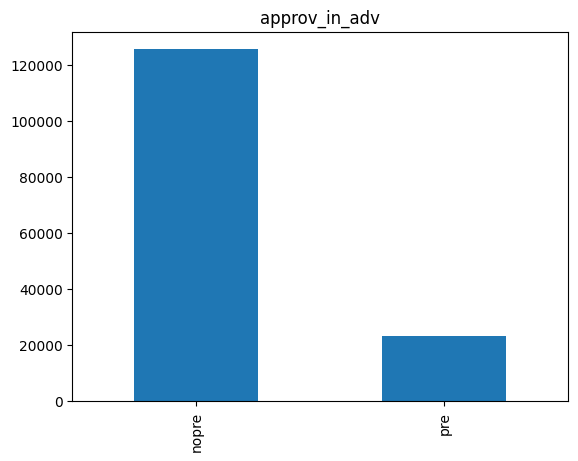

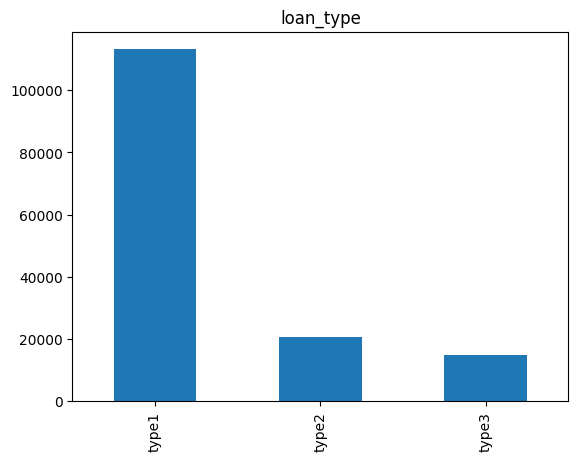

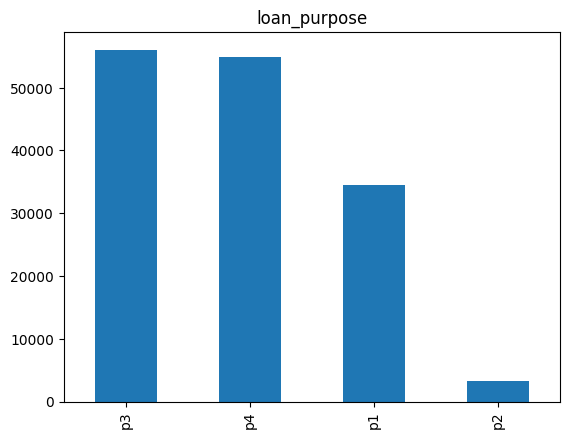

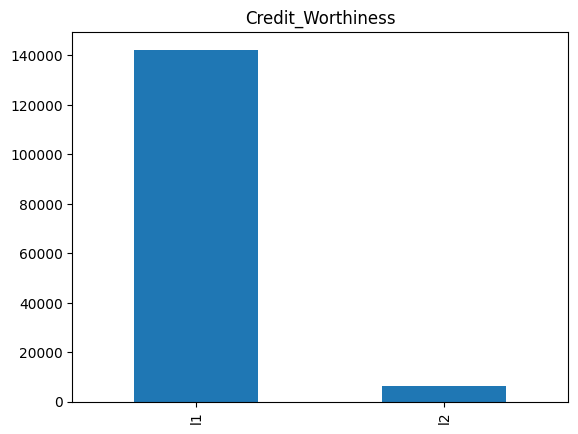

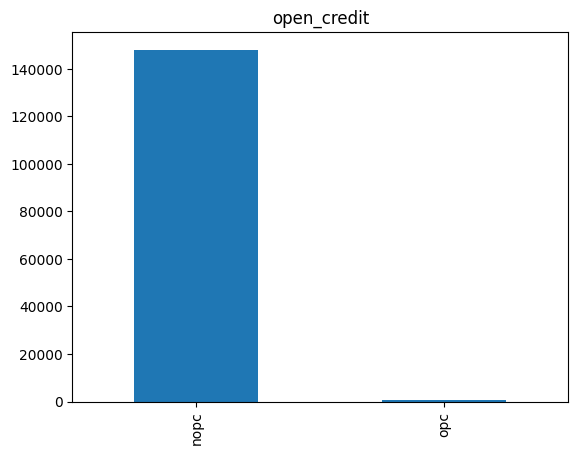

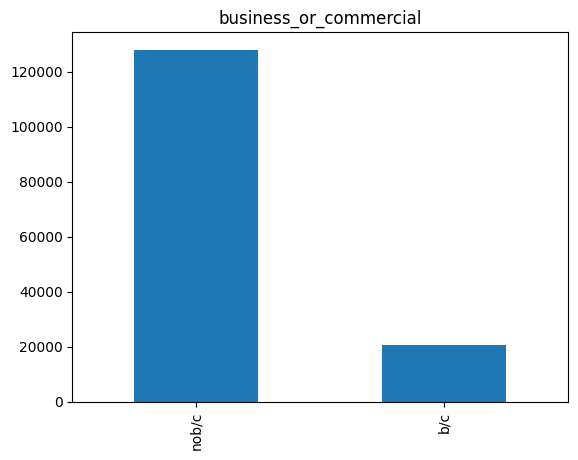

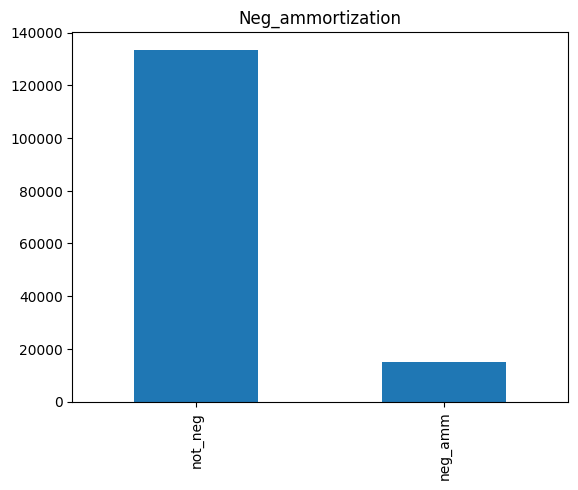

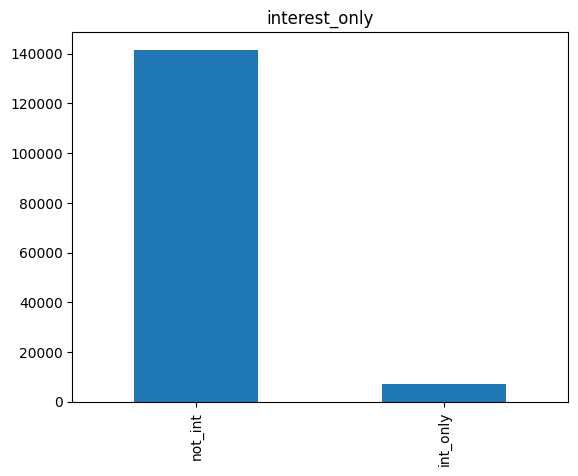

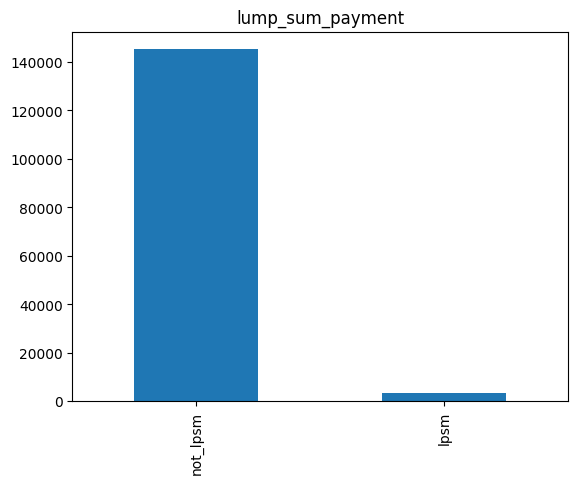

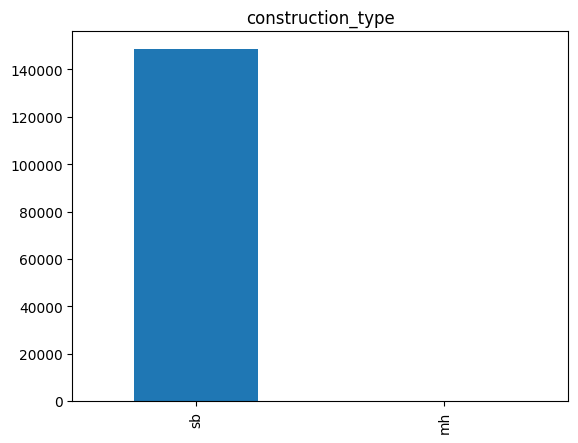

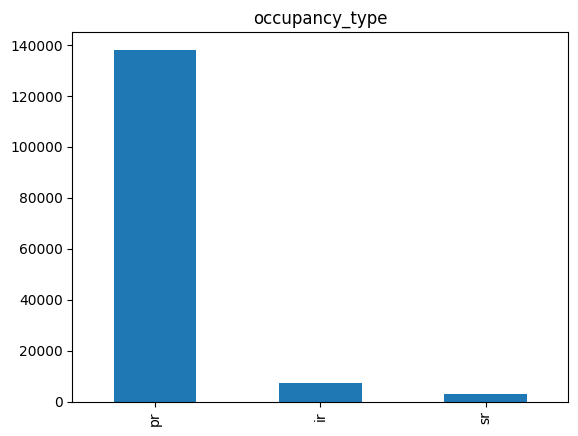

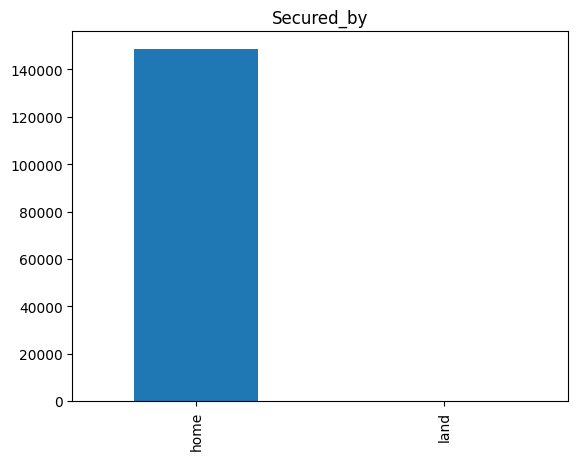

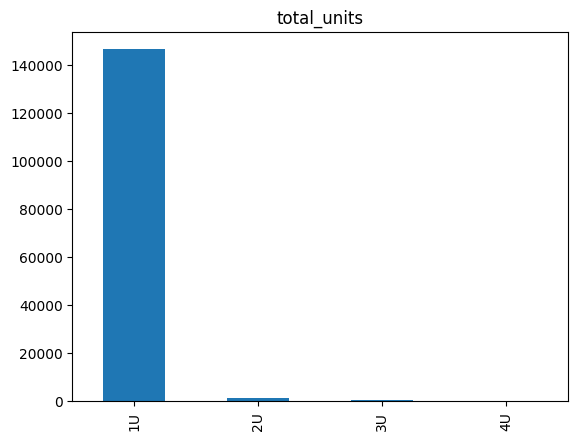

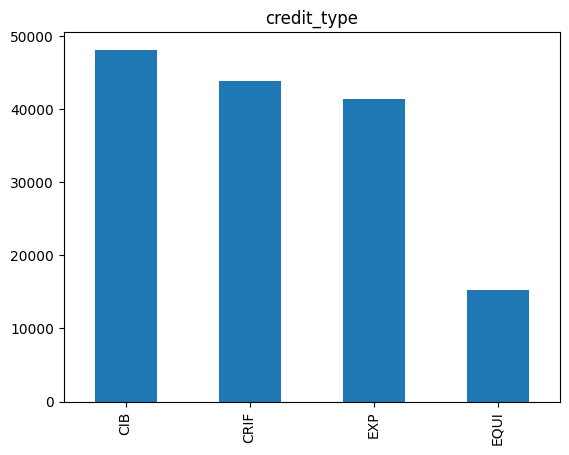

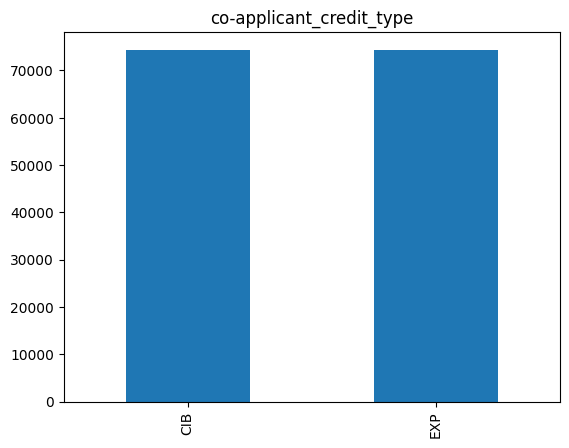

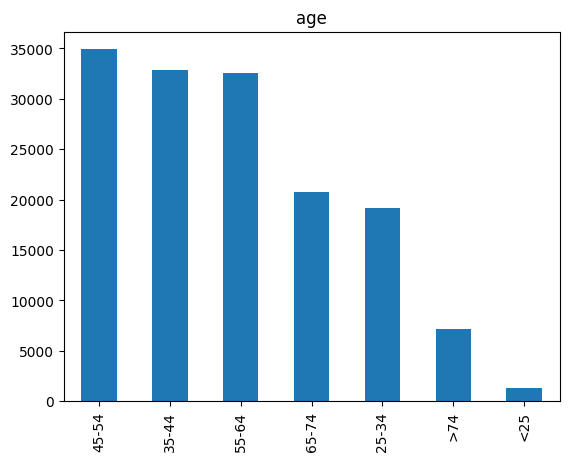

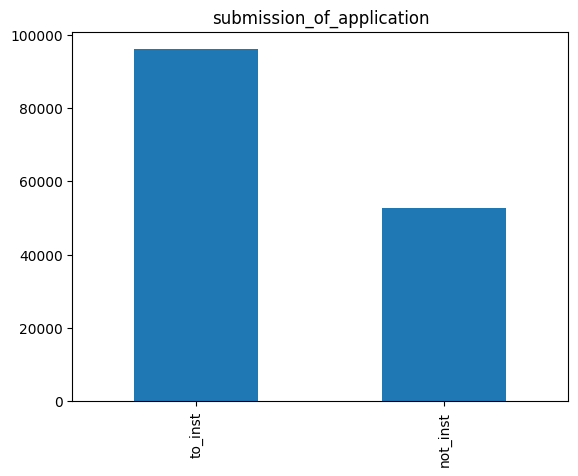

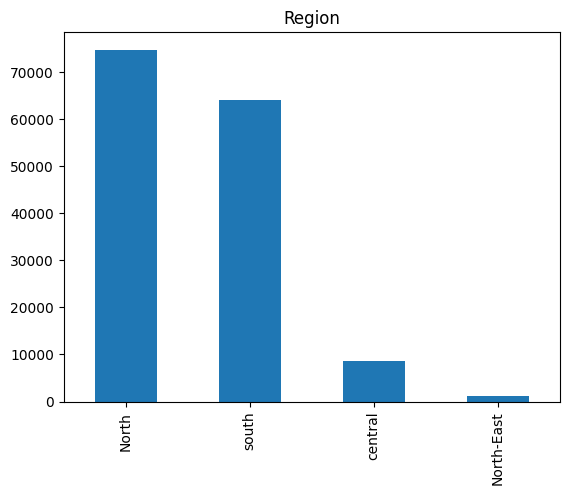

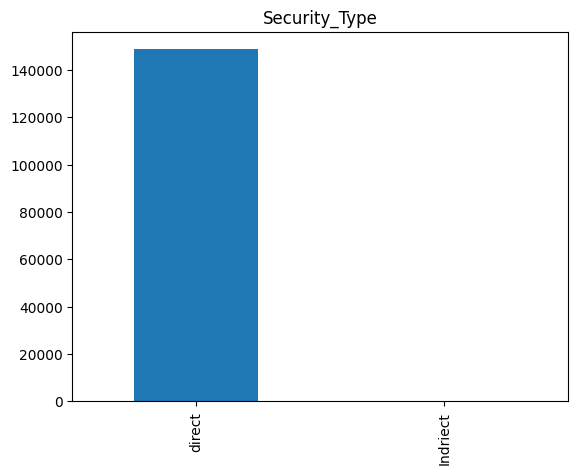

In [39]:
# Lets plot categorical variables
# Select object type columns
object_cols = final_df.select_dtypes(include='object').columns

# Plot bar graphs for object columns
for col in object_cols:
    plt.figure()  # Create a new figure for each bar plot
    final_df[col].value_counts().plot(kind='bar')
    plt.title(col)  # Set the title of the plot to the column name
    plt.show()  # Display the plot

C:\Users\naman\AppData\Local\Temp\ipykernel_51952\3008213693.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[col], kde=True)


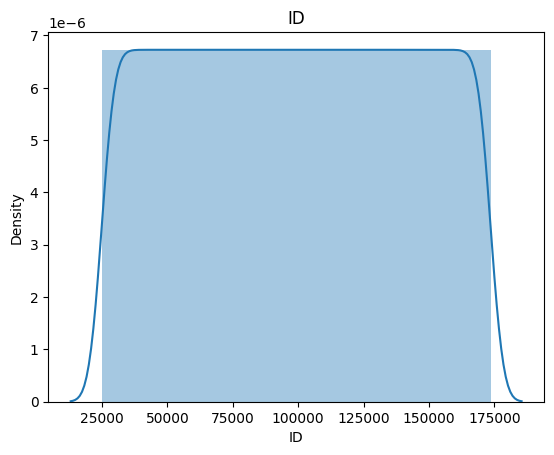

C:\Users\naman\AppData\Local\Temp\ipykernel_51952\3008213693.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[col], kde=True)
d:\LLM\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


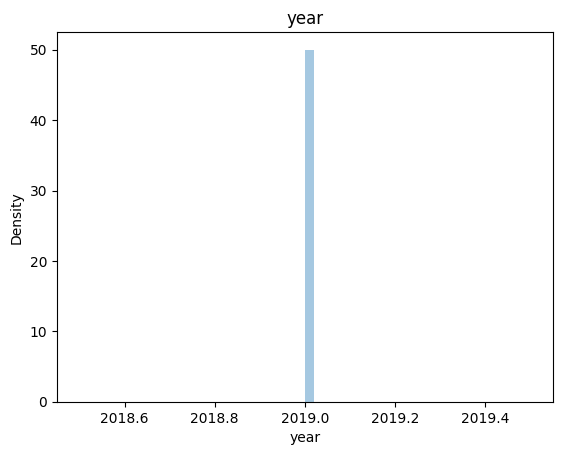

C:\Users\naman\AppData\Local\Temp\ipykernel_51952\3008213693.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[col], kde=True)


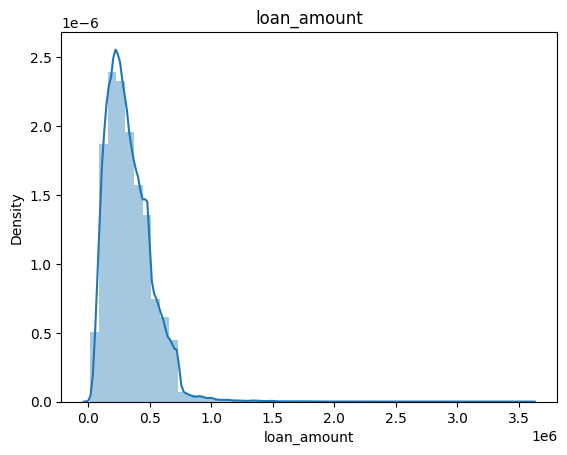

C:\Users\naman\AppData\Local\Temp\ipykernel_51952\3008213693.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[col], kde=True)


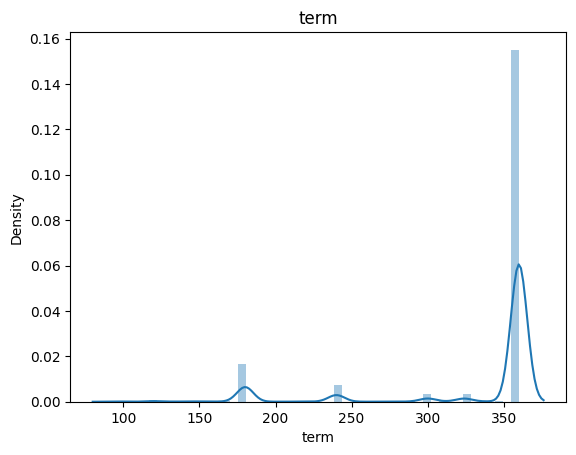

C:\Users\naman\AppData\Local\Temp\ipykernel_51952\3008213693.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[col], kde=True)


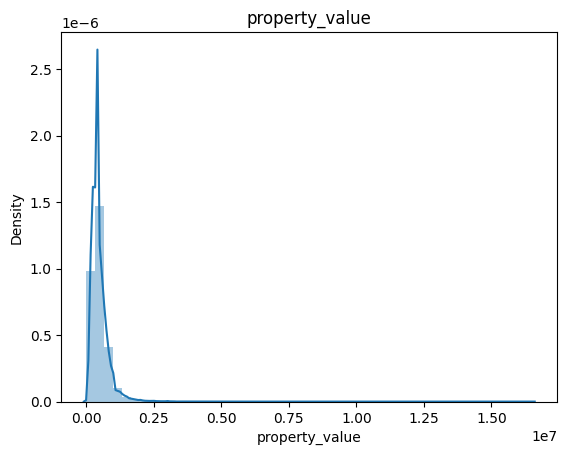

C:\Users\naman\AppData\Local\Temp\ipykernel_51952\3008213693.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[col], kde=True)


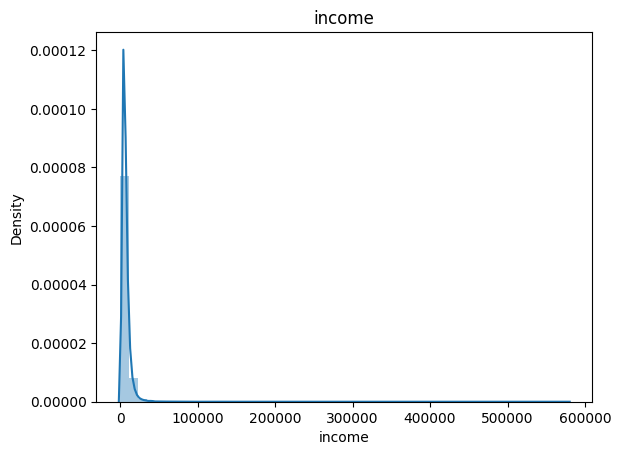

C:\Users\naman\AppData\Local\Temp\ipykernel_51952\3008213693.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[col], kde=True)


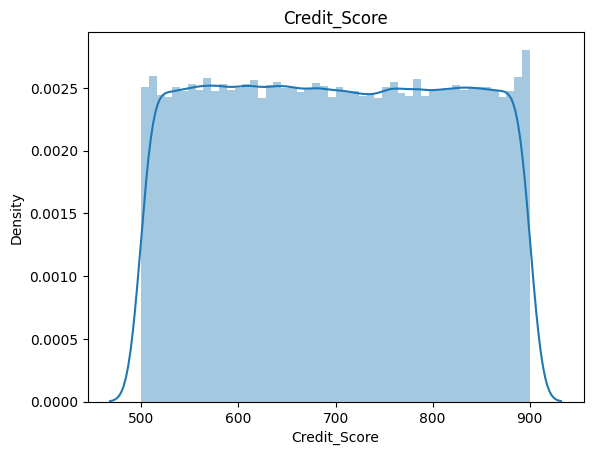

C:\Users\naman\AppData\Local\Temp\ipykernel_51952\3008213693.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[col], kde=True)


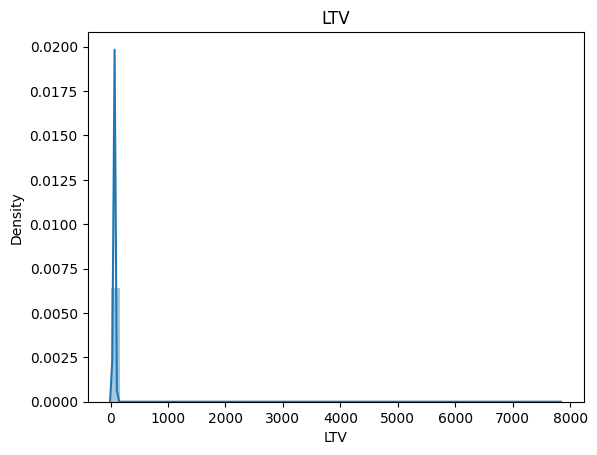

C:\Users\naman\AppData\Local\Temp\ipykernel_51952\3008213693.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[col], kde=True)


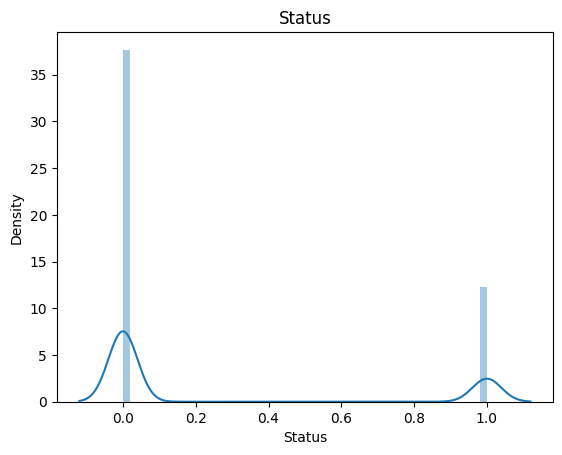

C:\Users\naman\AppData\Local\Temp\ipykernel_51952\3008213693.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[col], kde=True)


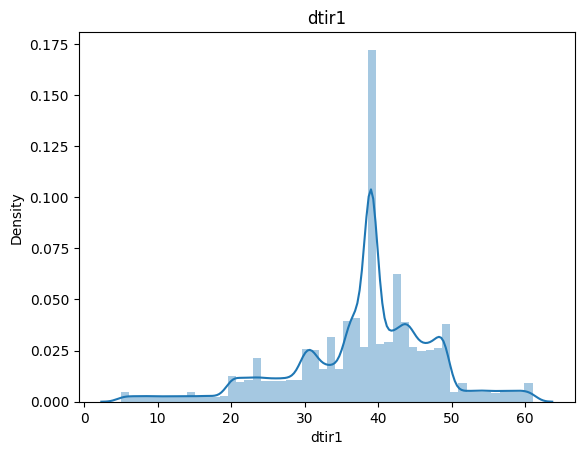

In [40]:
# Select non-object type columns
non_object_cols = final_df.select_dtypes(exclude='object').columns

# Plot smooth histograms for non-object columns
for col in non_object_cols:
    sns.distplot(final_df[col], kde=True)
    plt.title(col)  # Set the title of the plot to the column name
    plt.show()  # Display the plot

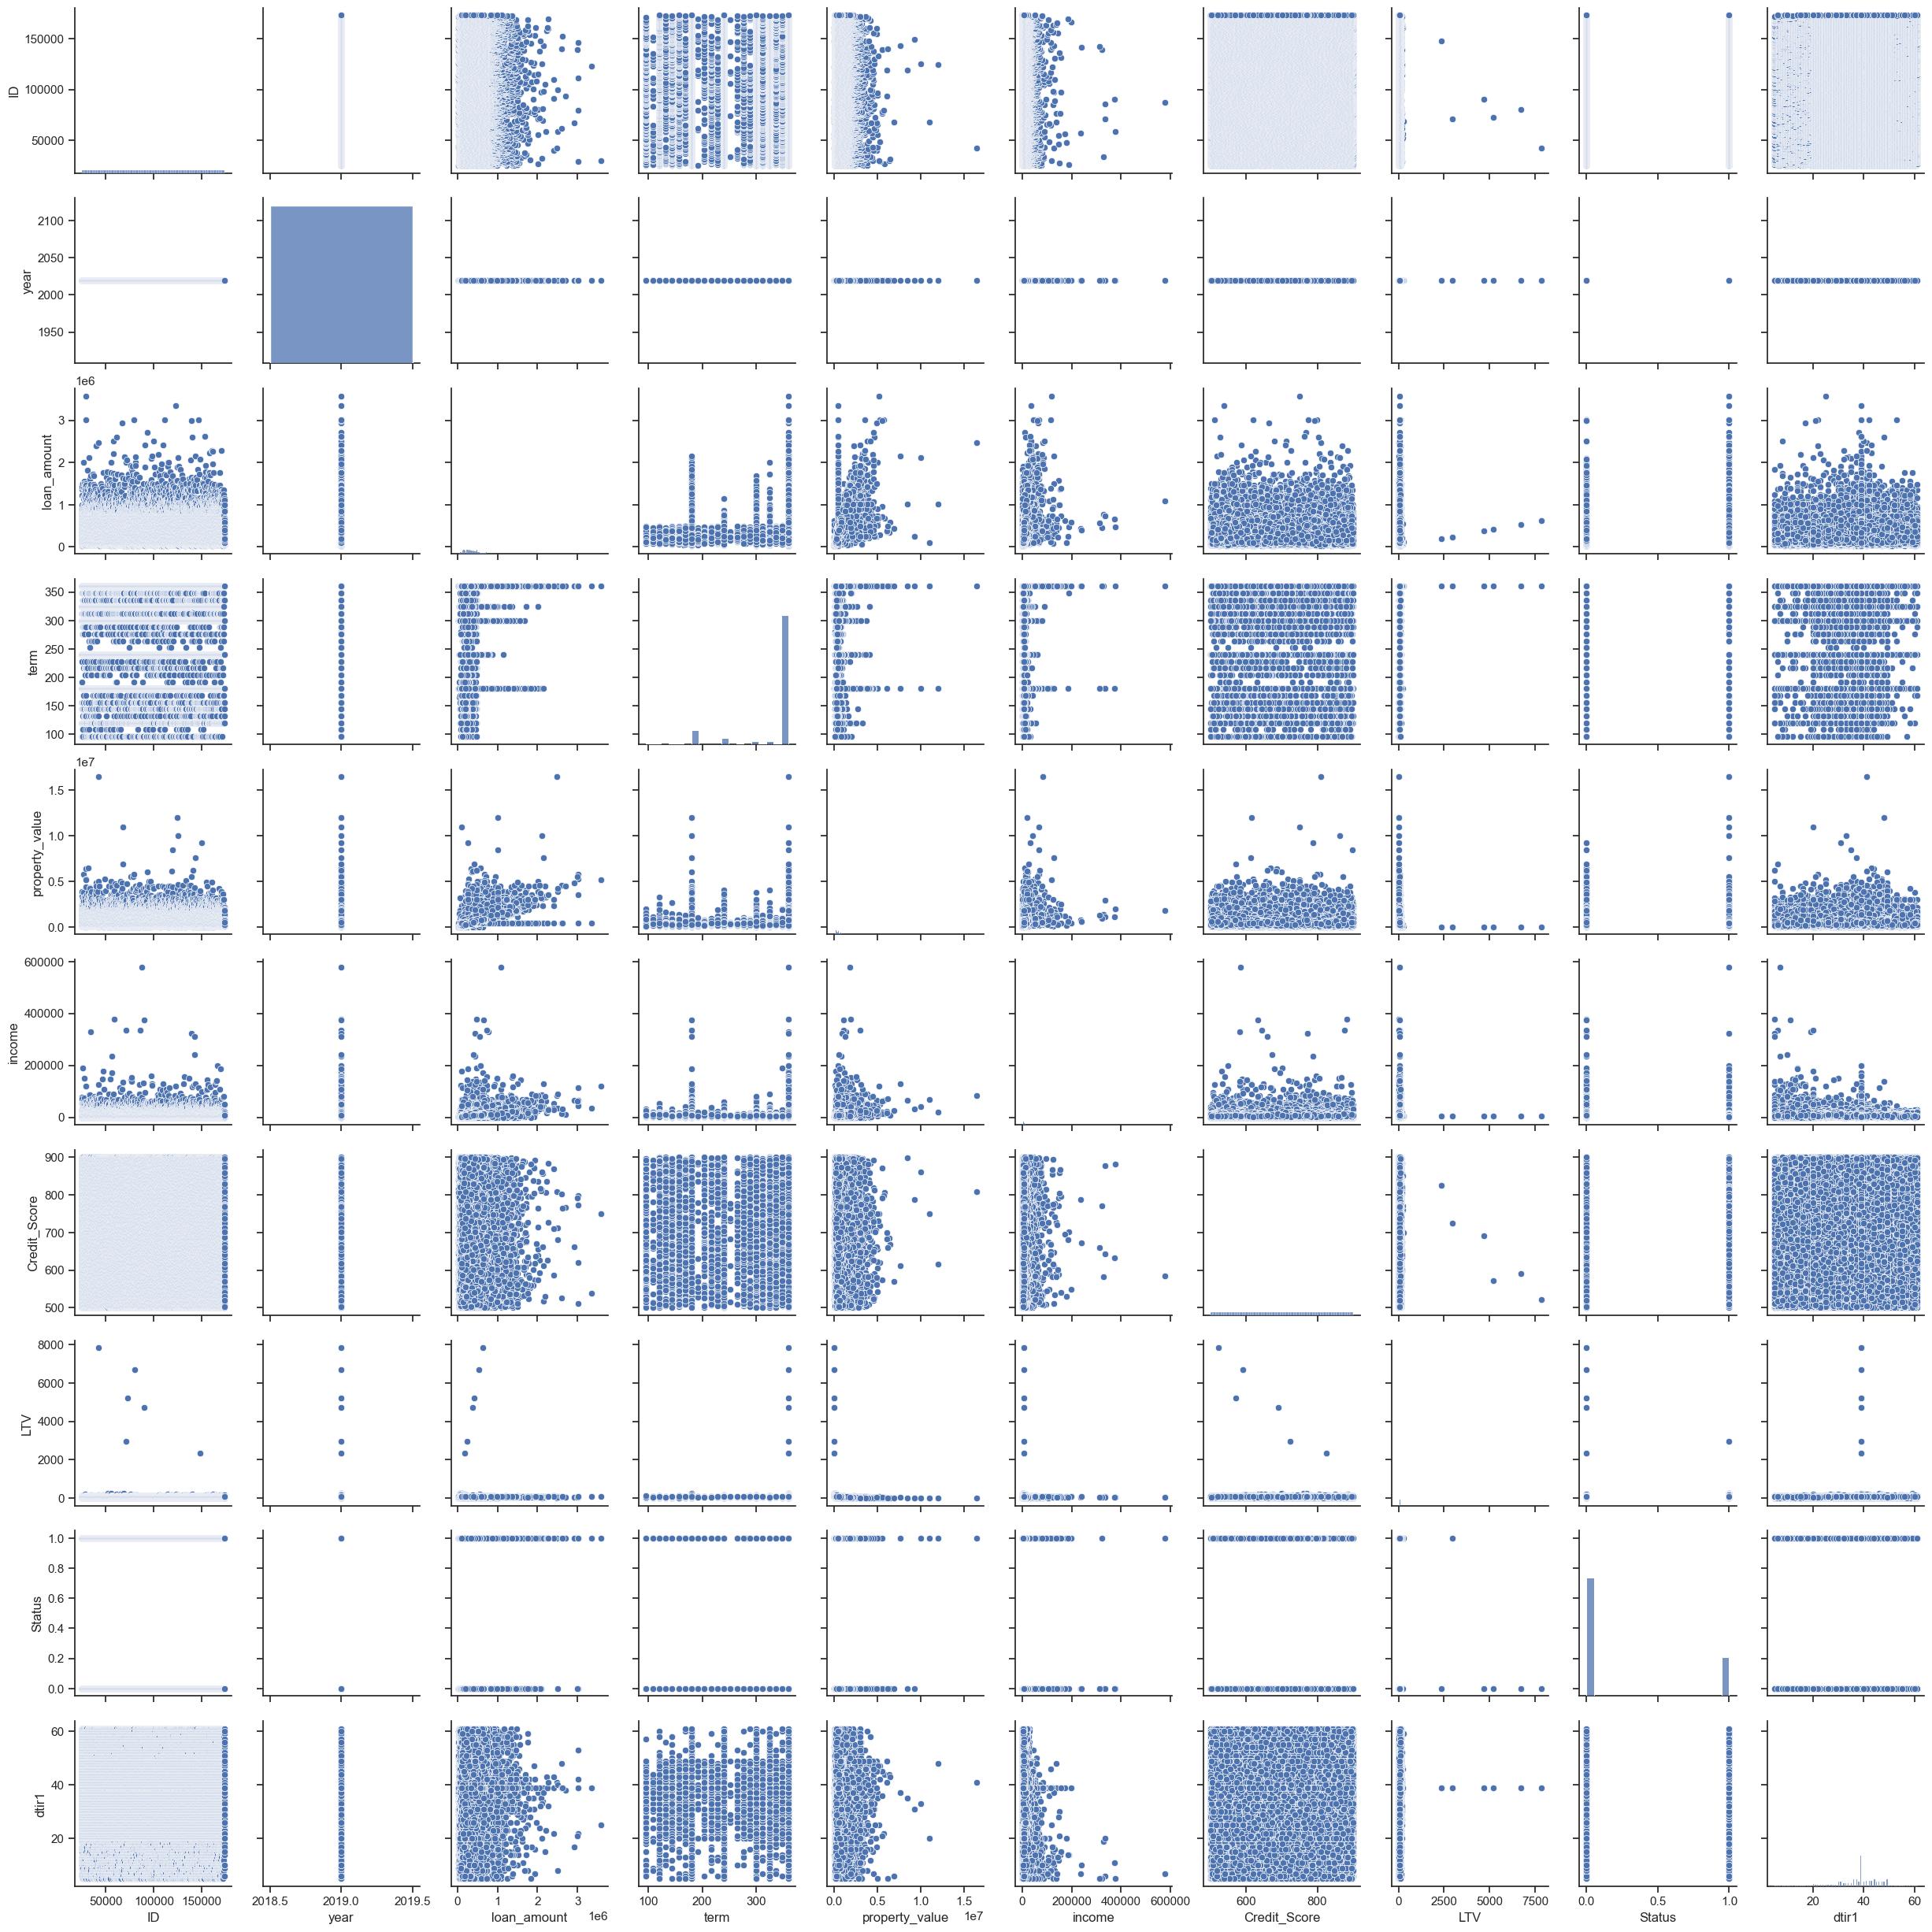

In [42]:
# Select non-object type columns
non_object_cols = final_df.select_dtypes(exclude='object').columns

# Plot scatter plots for each pair of non-object columns
sns.set(style="ticks")
sns.pairplot(final_df[non_object_cols])
plt.show()

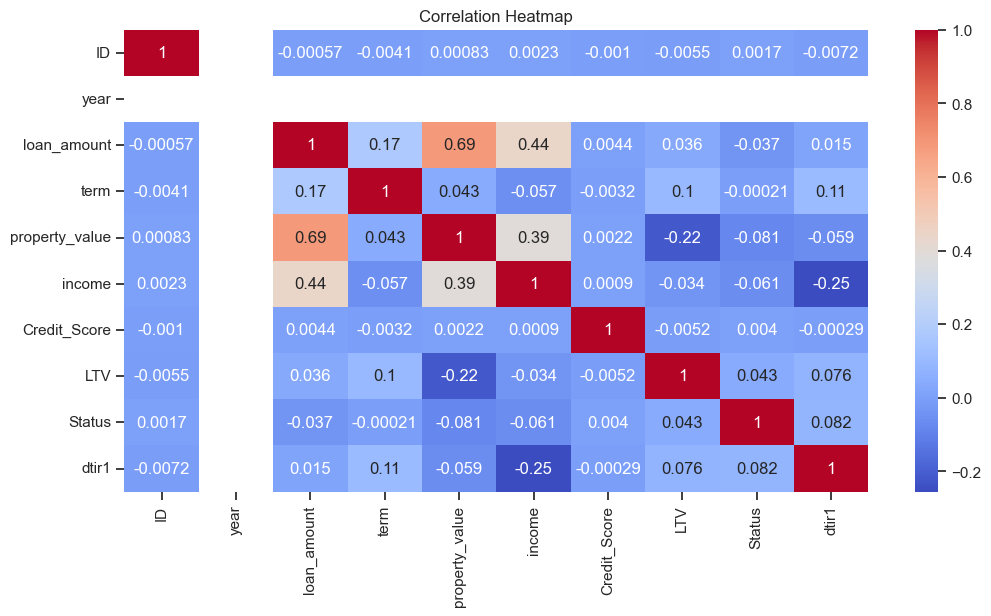

In [45]:
# Compute Pearson correlation coefficient
correlation_matrix = final_df[non_object_cols].corr()
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

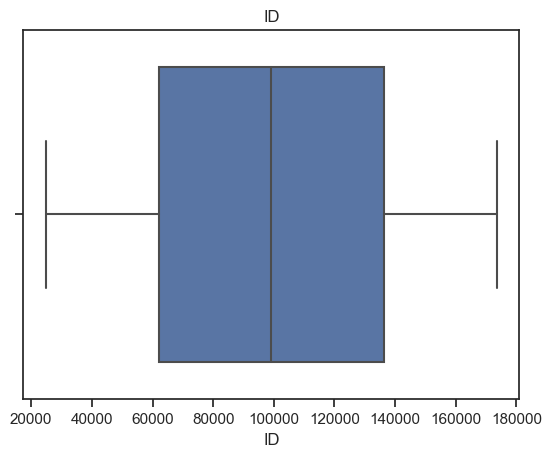

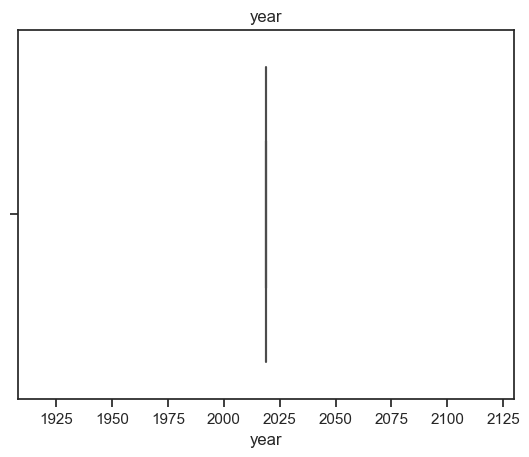

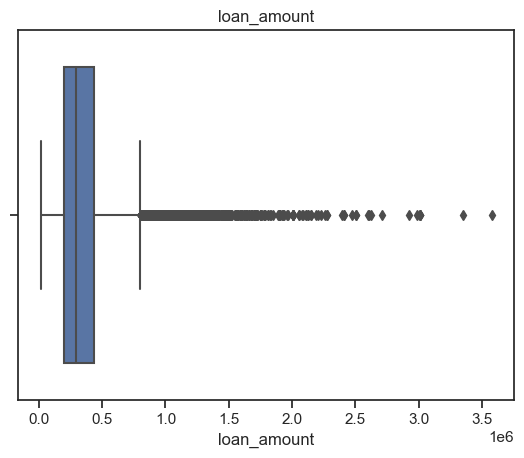

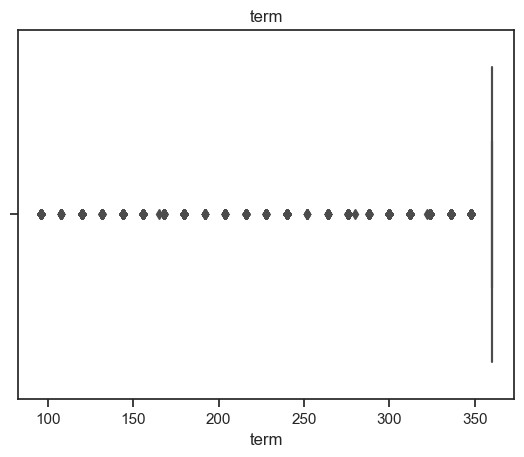

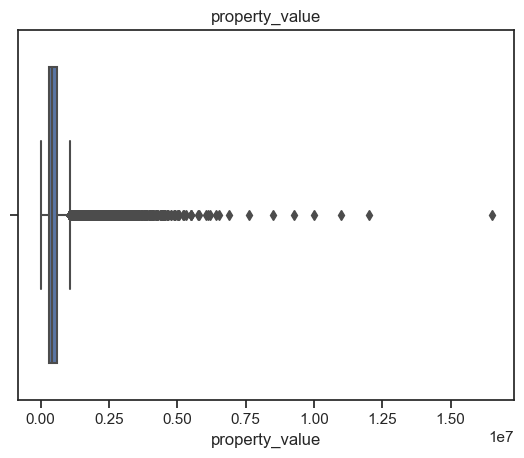

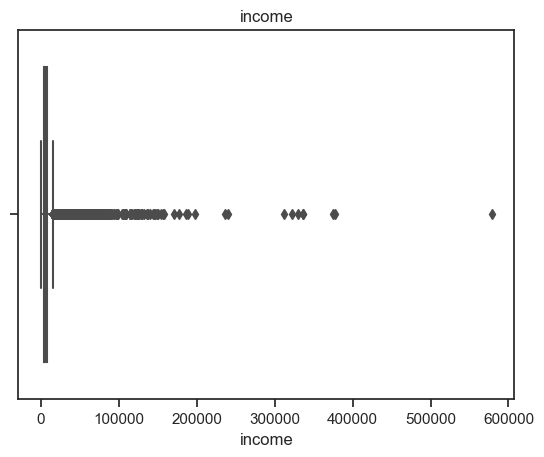

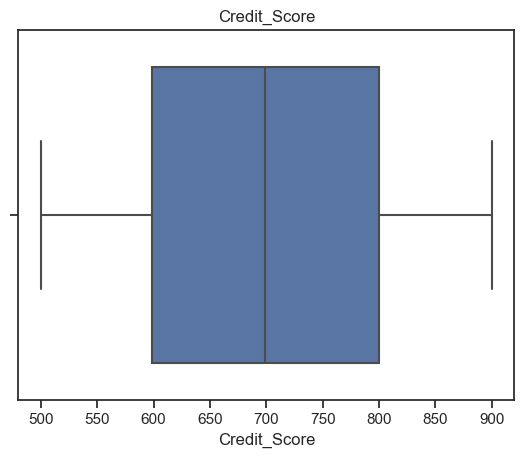

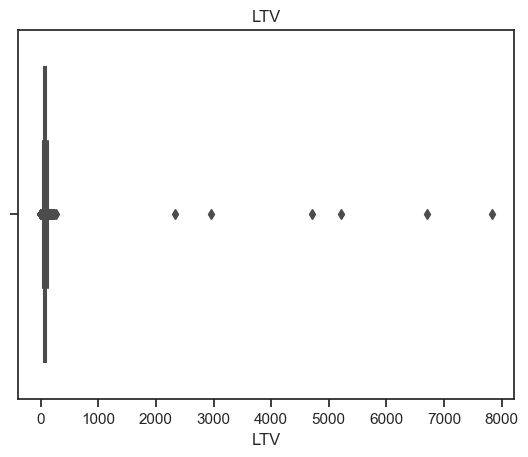

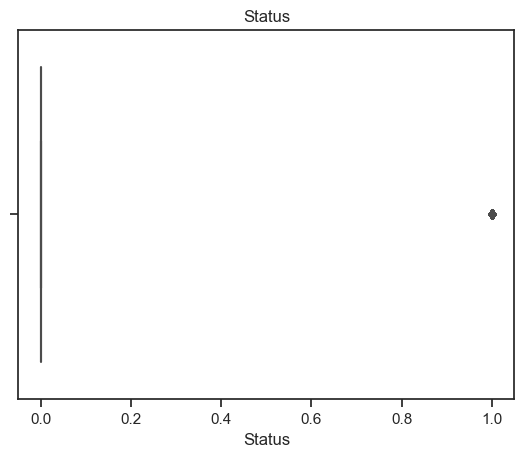

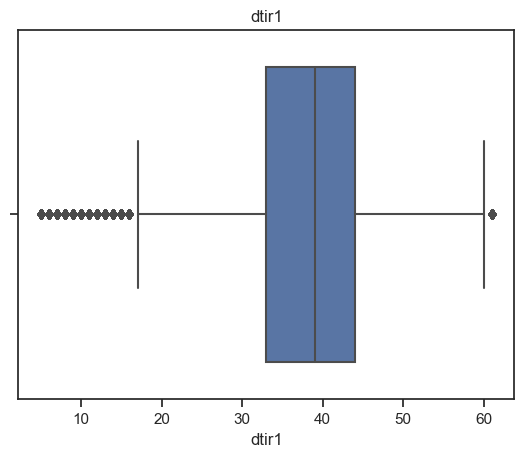

In [46]:

for col in non_object_cols:
    plt.figure()  # Create a new figure for each box plot
    sns.boxplot(data=final_df, x=col)
    plt.title(col)  # Set the title of the plot to the column name
    plt.show()  # Display the plot

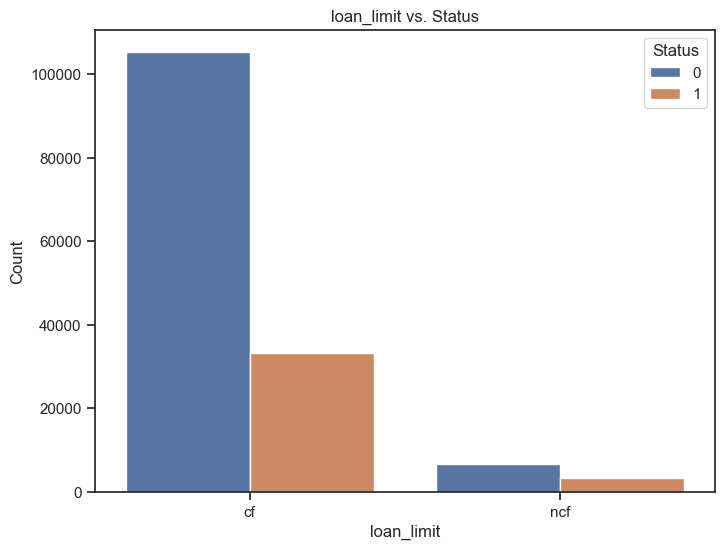

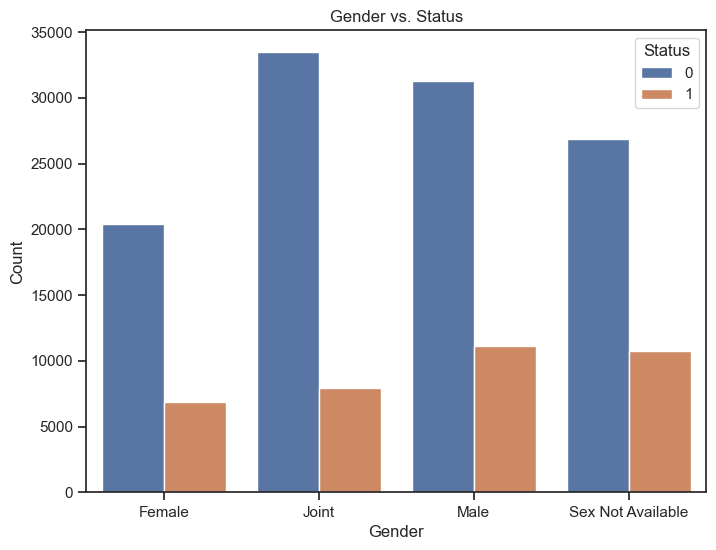

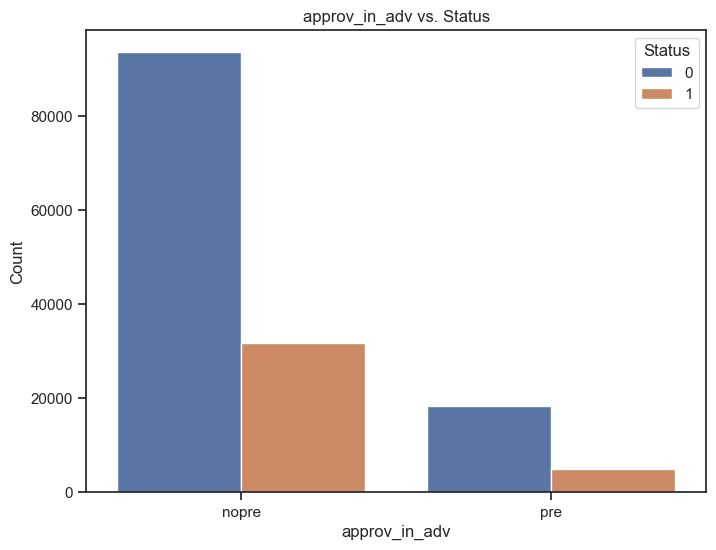

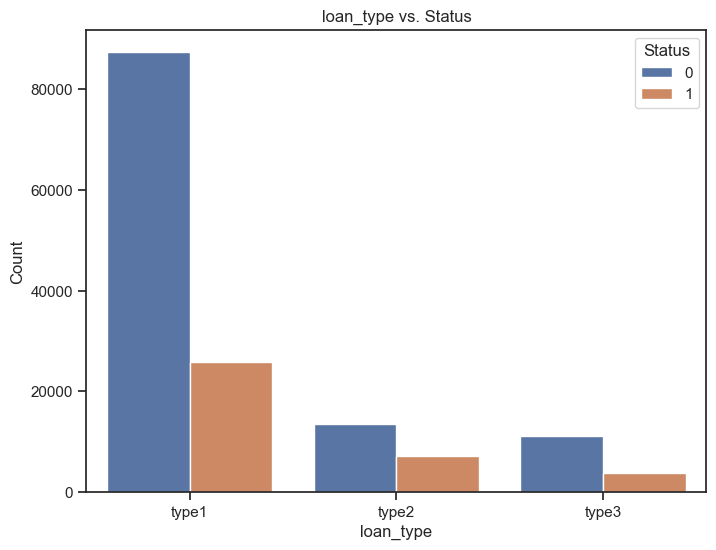

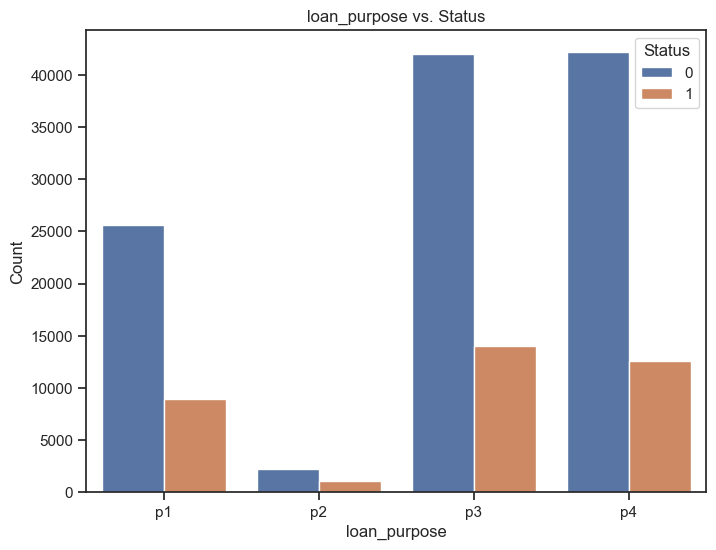

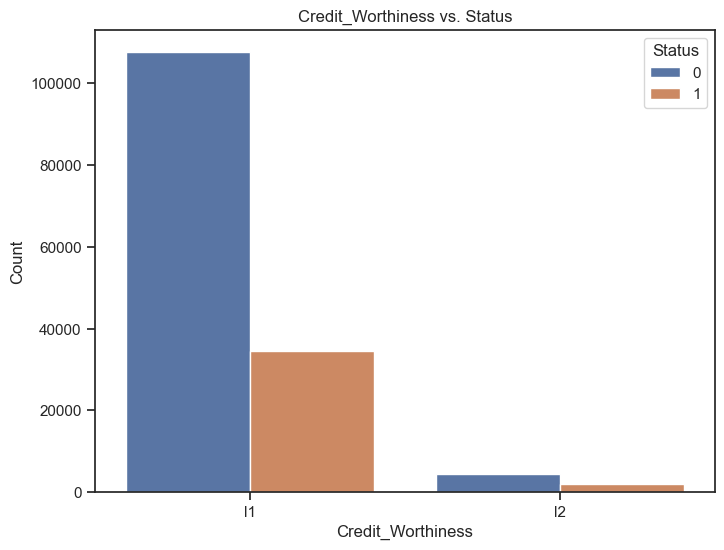

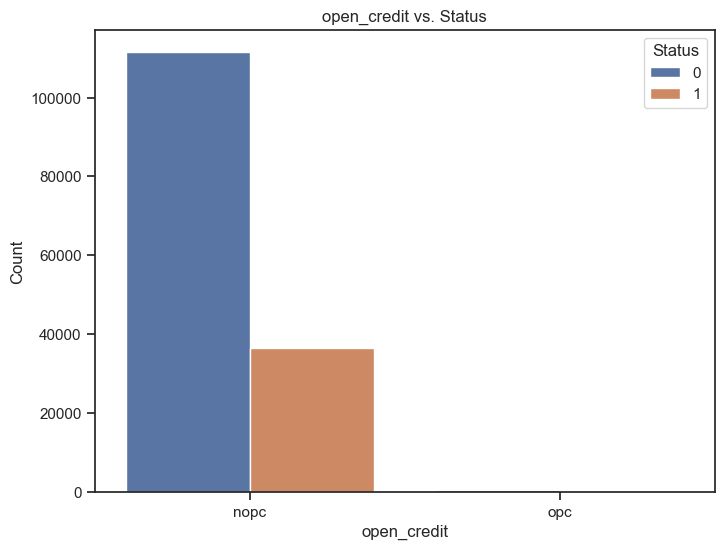

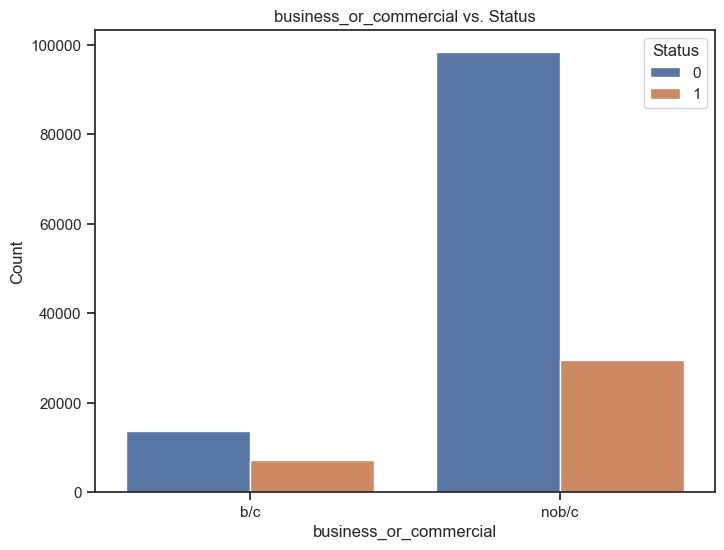

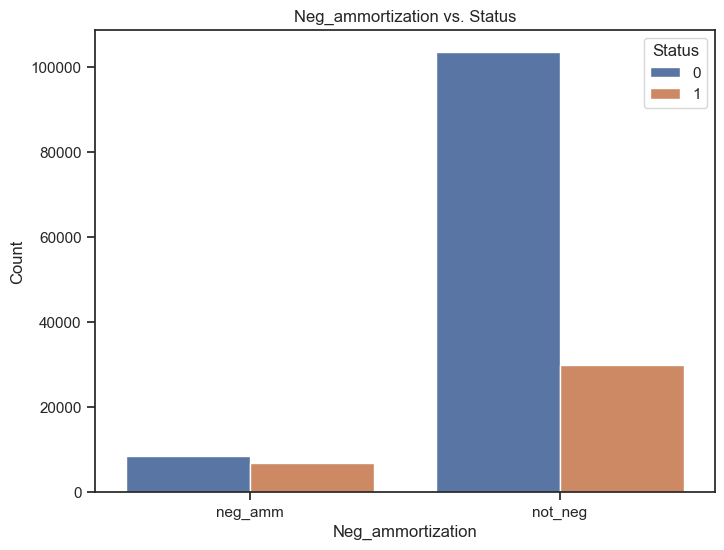

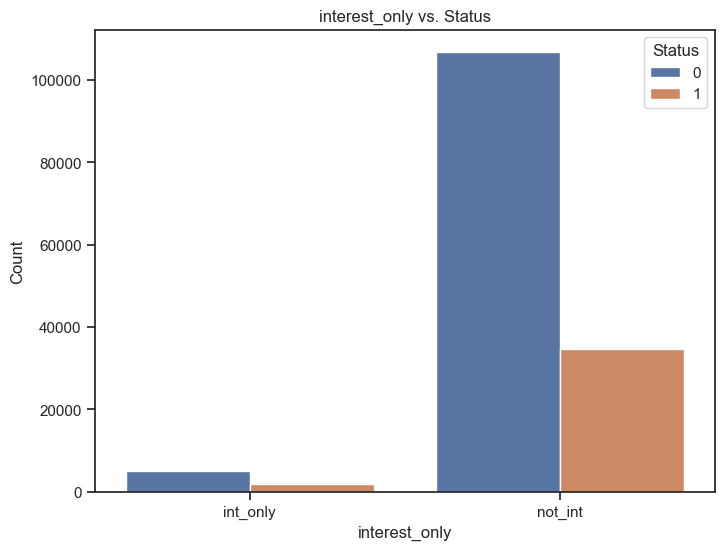

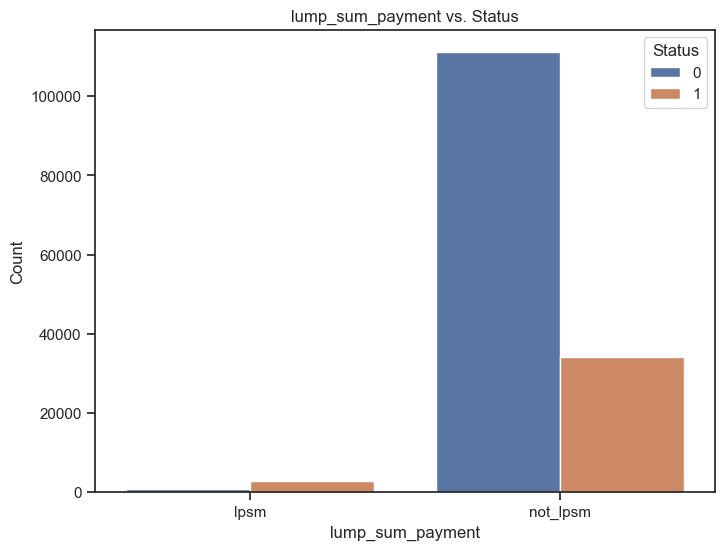

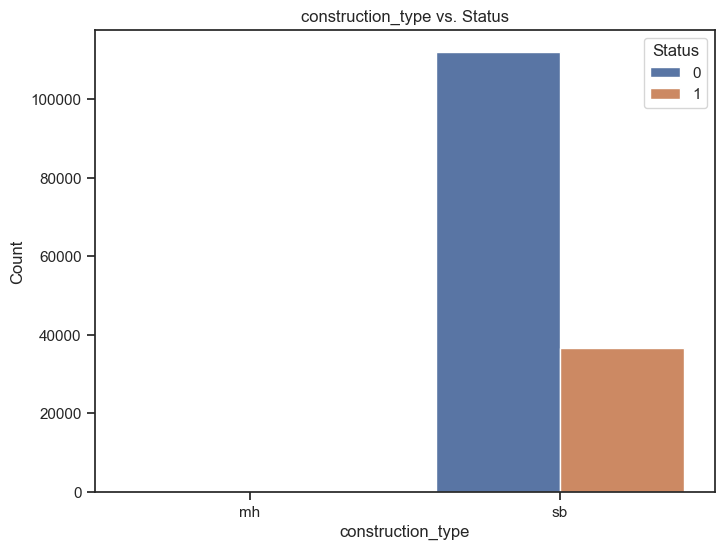

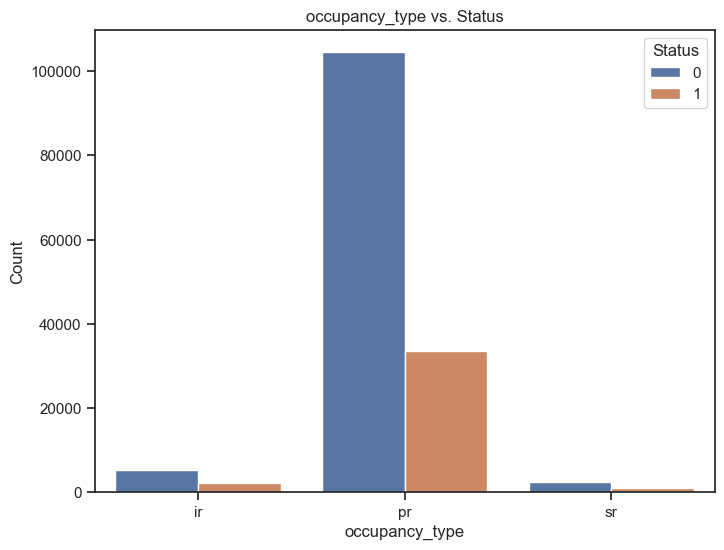

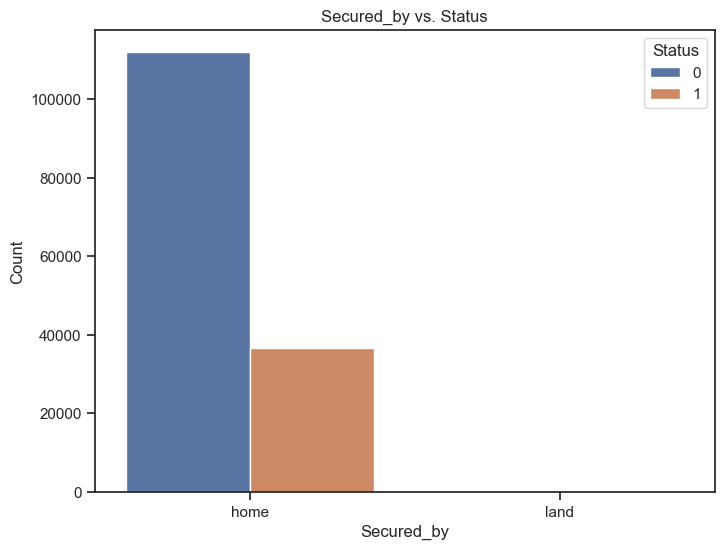

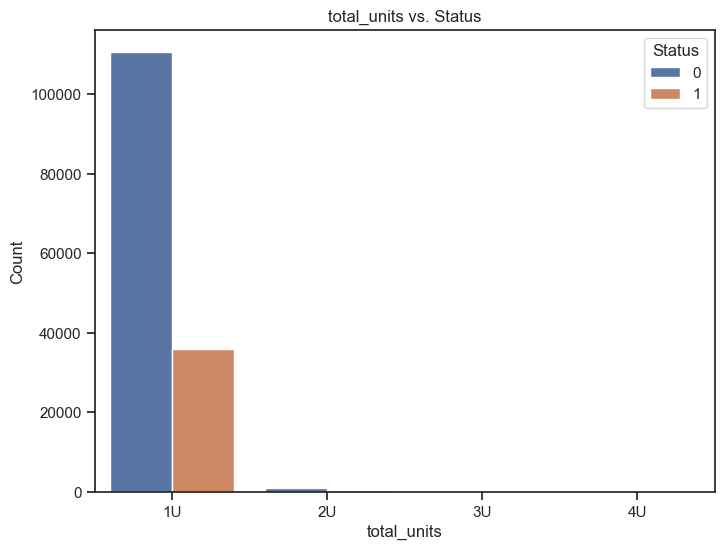

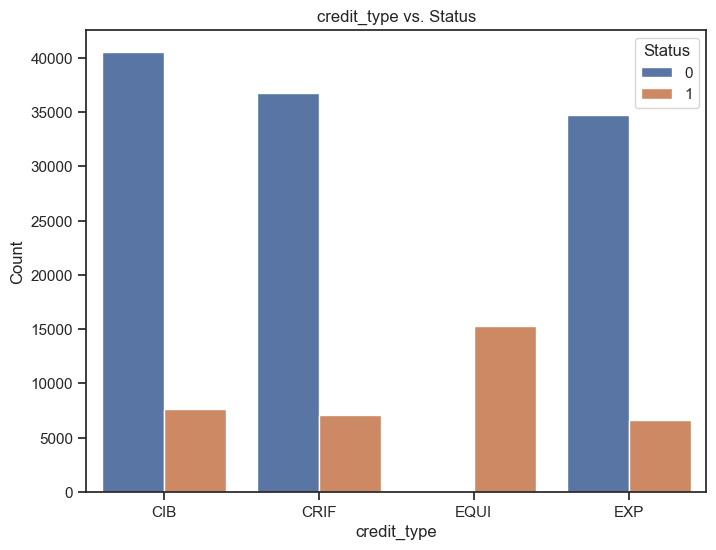

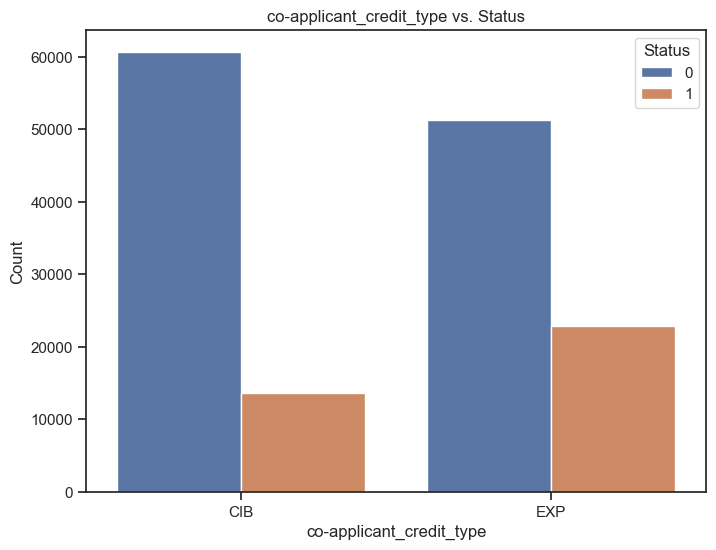

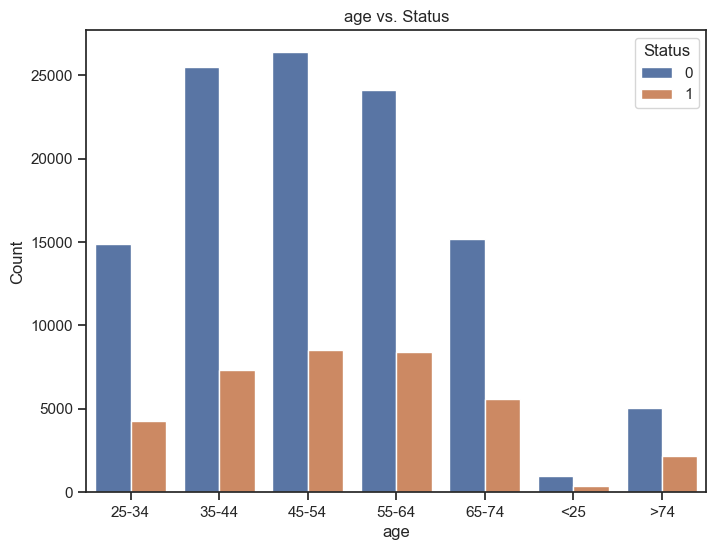

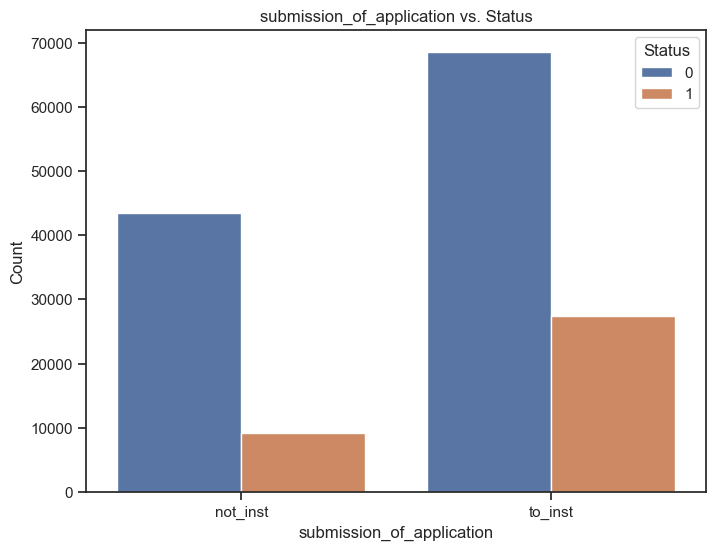

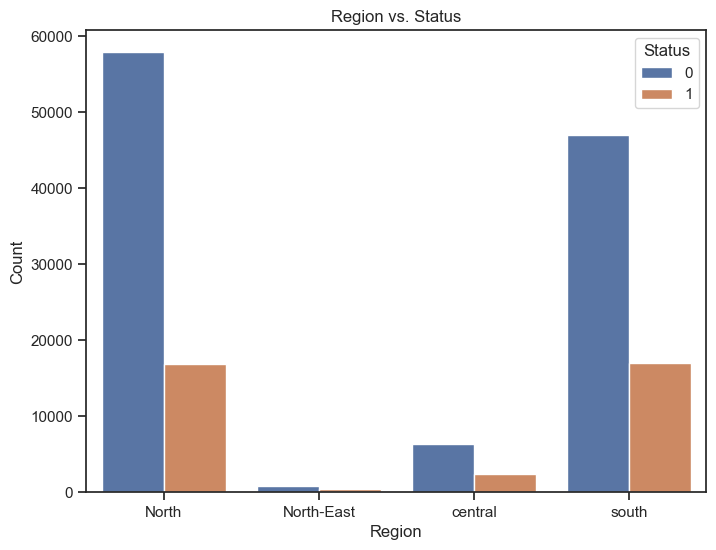

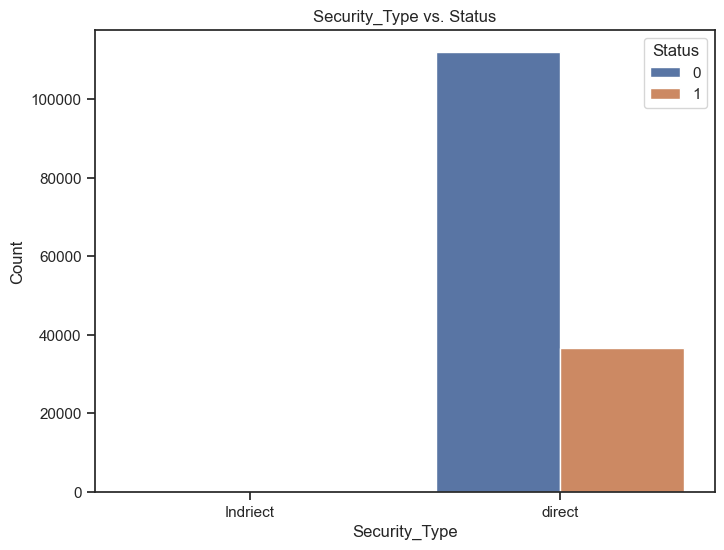

In [50]:
# Lets start the analysis

# 1. Lets check the status of the loan based on other columns
obj_columns = final_df.select_dtypes(include='object')
for col in obj_columns:
    col_status_counts = final_df.groupby([col, 'Status']).size().reset_index(name='Count')


    # Create bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(data=col_status_counts, x=col, y='Count', hue='Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} vs. Status')
    plt.legend(title='Status')
    plt.show()

In [51]:
final_df.to_csv("nonnull_data.csv")

In [53]:
for col in non_object_cols:
    print(f"{col}: {final_df[col].std()}")

ID: 42917.47659753542
year: 0.0
loan_amount: 183909.3101270855
term: 58.40248809446625
property_value: 342022.06395680027
income: 6300.067060153331
Credit_Score: 115.87585660446858
LTV: 37.8907135504244
Status: 0.4309422068621314
dtir1: 9.663416502570959
